## AirBnb data analysis

#### Importing packages

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data set

In [3]:
bnb = pd.read_csv("AB_NYC_2019.csv")
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb.shape

(48895, 16)

In [6]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Missing values

In [7]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### If the number of reviews is equal to 0 then it makes no sence to have a last review or a reviews per month data.

Asumption test

In [10]:
assumption_test = bnb.loc[(bnb.last_review.isnull()) & (bnb.reviews_per_month.isnull()), ['number_of_reviews',  'last_reviews', 'reviews_per_month']]
assumption_test.head()

,number_of_reviews,last_reviews,reviews_per_month
2,0,NaN,NaN
19,0,NaN,NaN
26,0,NaN,NaN
36,0,NaN,NaN
38,0,NaN,NaN


In [11]:
assumption_test.shape

(10052, 3)

#### conclusion:  In this three columns there are 10052 missing values or number of reviews equal to 0

#### Filling the missing values in reviews_per_month and last_revies with 0.

In [12]:
bnb.reviews_per_month.fillna(0, inplace=True)
bnb.last_review.fillna(0, inplace=True)

In [13]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Finding the distribution of rentals by neighbourhood group

In [47]:
 bnb.neighbourhood.value_counts().head(5)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

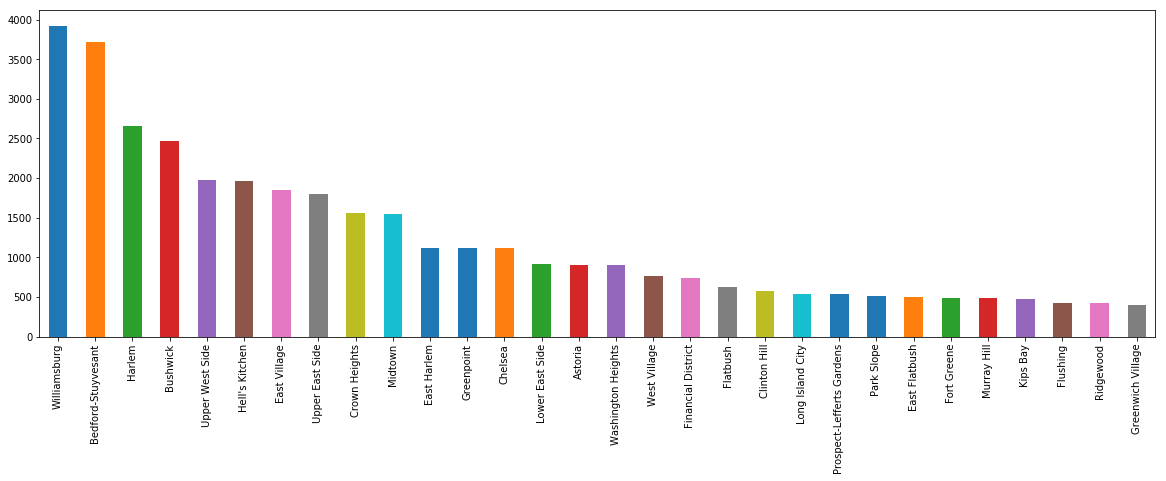

In [57]:
plt.figure(figsize=(20,6))
bnb.neighbourhood.value_counts().head(30).plot("bar")

In [15]:
bnb.room_type.value_counts().head()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

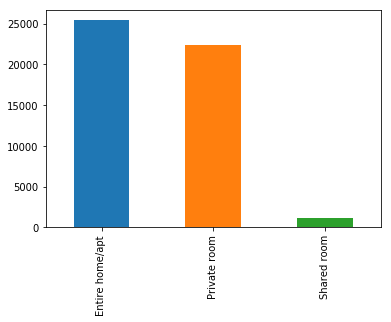

In [59]:

bnb.room_type.value_counts().head(30).plot("bar")

<Figure size 1440x432 with 0 Axes>

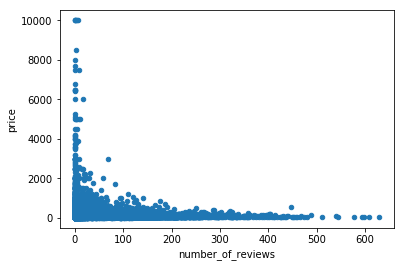

In [63]:
plt.figure(figsize=(20,6))
bnb.plot.scatter(y = "price", x = "number_of_reviews")


#### Finding out if there is any corelation between the availability and price

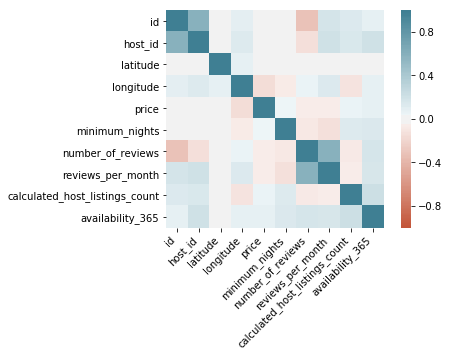

In [68]:
corr = bnb.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<Figure size 1440x432 with 0 Axes>

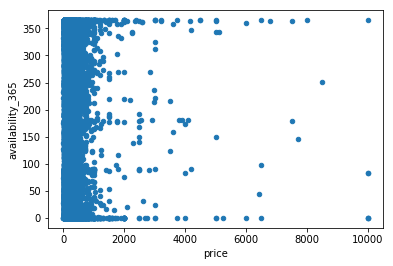

In [65]:
plt.figure(figsize=(20,6))
bnb.plot.scatter( "price", "availability_365")

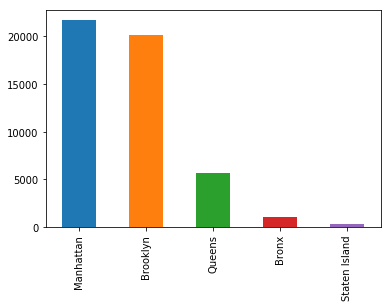

In [88]:
bnb['neighbourhood_group'].value_counts().plot.bar()

##### Most rentals are located in manhattan

### Erasing ID, description, host name and host ID

In [32]:
bnb = bnb.drop(columns = ["id", "name", "host_id", "host_name", "neighbourhood_group"])

In [33]:
dummies = pd.get_dummies(bnb["neighbourhood"])
dummies.head()

,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Merging both data frames

In [34]:
bnb = pd.concat([bnb, dummies], axis = 1)

In [35]:
bnb.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,...,0,0,0,0,0,0,0,0,0,0
1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,...,0,0,0,0,0,0,0,0,0,0
2,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
3,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,...,0,0,0,0,0,0,0,0,0,0
4,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,...,0,0,0,0,0,0,0,0,0,0


#### Now that the neighbourhood has been dummifyed, I can remove that column.

In [39]:
bnb = bnb.drop(columns = ['neighbourhood'])


KeyError: "['neighbourhood'] not found in axis"

In [40]:
bnb.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Dummyfying room type

In [42]:
room_dummy = pd.get_dummies(bnb['room_type'])

In [43]:
room_dummy.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


#### Attaching new data frame and droping room_type column

In [44]:
bnb = pd.concat([bnb, room_dummy], axis = 1)

In [45]:
bnb = bnb.drop(columns = ['room_type'])

In [47]:
bnb.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Allerton,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,...,0,0,0,0,0,0,0,1,0,0
